# Imports

In [1]:
import sys

import dotenv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, HTML

dotenv.load_dotenv()
sys.path.append("../../src")
import dataframe_utils
import GiveMeSomeCredit

# Helper Functions

## `_plot_hist`

In [2]:
def _plot_hist(df, cols, colors, labels, title, ax=None):
    ax_is_none = ax is None
    if ax_is_none:
        fig, ax = plt.subplots()
        
    bins = np.arange(0, 1.01, 0.01)
    for col, color, label in zip(cols, colors, labels):
        ax.hist(df[col], bins=bins, alpha=0.6, color=color, label=label)
    
    ax.set_title(title)
    ax.set_xlabel("Probability")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0, 1)
    ax.legend()
    
    if ax_is_none:
        plt.show()

## `plot_normalized_probabilities`

In [3]:
def plot_normalized_probabilities(df, ax=None):
    _plot_hist(
        df, ["yes_prob_norm", "no_prob_norm"], ["seagreen", "firebrick"],
        ["P(Yes)", "P(No)"], "Normalized Probabilities", ax=ax
    )

## `plot_unnormalized_probabilities`

In [4]:
def plot_unnormalized_probabilities(df, ax=None):
    _plot_hist(
        df, ["yes_prob", "no_prob"], ["seagreen", "firebrick"],
        ["P(Yes)", "P(No)"], "Unnormalized Probabilities", ax=ax
    )

## `plot_wasted_probabilities`

In [5]:
def plot_wasted_probabilities(df, ax=None):
    _plot_hist(
        df, ["W"], ["slategray"],
        ["Wasted Probability"], "Wasted Probabilities", ax=ax
    )

# Load the Dataset

This section loads the predictions into a DataFrame and displays its basic information.


In [6]:
training_df, validation_df = GiveMeSomeCredit.load_training_validation_results()

display(HTML(f"<h1>Training Predictions</h1>"))
dataframe_utils.print_dataframe_info(training_df)

display(HTML(f"<h1>Validation Predictions</h1>"))
dataframe_utils.print_dataframe_info(validation_df)

DataFrame Memory Usage: 7.32 MB


dtype   count  non_null  \
target                            SeriousDlqin2yrs    int64  120000    120000   
Logistic Regression               pred                int64  120000    120000   
                                  pred_probs        float64  120000    120000   
Random Forest                     pred                int64  120000    120000   
                                  pred_probs        float64  120000    120000   
Histogram-Based Gradient Boosting pred                int64  120000    120000   
                                  pred_probs        float64  120000    120000   

                                                    null_count      mean  \
target                            SeriousDlqin2yrs           0  0.066842   
Logistic Regression               pred                       0  0.248500   
                                  pred_probs                 0  0.413107   
Random Forest                     pred                       0  0.067300   
                                  pred_probs                 0  0.065981   
Histogram-Based Gradient Boosting pred                       0  0.021292   
                                  pred_probs                 0  0.066893   

                                                         std           min  \
target                            SeriousDlqin2yrs  0.249749  0.000000e+00   
Logistic Regression               pred              0.432145  0.000000e+00   
                                  pred_probs        0.152842  4.039935e-32   
Random Forest                     pred              0.250542  0.000000e+00   
                                  pred_probs        0.181611  0.000000e+00   
Histogram-Based Gradient Boosting pred              0.144355  0.000000e+00   
                                  pred_probs        0.116309  2.502051e-03   

                                                         25%       50%  \
target                            SeriousDlqin2yrs  0.000000  0.000000   
Logistic Regression               pred              0.000000  0.000000   
                                  pred_probs        0.299985  0.396708   
Random Forest                     pred              0.000000  0.000000   
                                  pred_probs        0.000000  0.010000   
Histogram-Based Gradient Boosting pred              0.000000  0.000000   
                                  pred_probs        0.009775  0.021093   

                                                         75%       max  
target                            SeriousDlqin2yrs  0.000000  1.000000  
Logistic Regression               pred              0.000000  1.000000  
                                  pred_probs        0.499273  1.000000  
Random Forest                     pred              0.000000  1.000000  
                                  pred_probs        0.030000  1.000000  
Histogram-Based Gradient Boosting pred              0.000000  1.000000  
                                  pred_probs        0.064913  0.874337

target Logistic Regression            Random Forest  \
       SeriousDlqin2yrs                pred pred_probs          pred   
ID                                                                     
1                     1                   1   0.756797             1   
2                     0                   0   0.464318             0   
3                     0                   1   0.707312             0   
5                     0                   0   0.209631             0   
6                     0                   0   0.249206             0   
...                 ...                 ...        ...           ...   
149996                0                   0   0.243774             0   
149997                0                   0   0.451480             0   
149998                0                   0   0.298296             0   
149999                0                   1   0.504252             0   
150000                0                   0   0.288816             0   

                  Histogram-Based Gradient Boosting             
       pred_probs                              pred pred_probs  
ID                                                              
1            0.71                                 0   0.342372  
2            0.03                                 0   0.089232  
3            0.10                                 0   0.320130  
5            0.08                                 0   0.124813  
6            0.01                                 0   0.008083  
...           ...                               ...        ...  
149996       0.00                                 0   0.004548  
149997       0.00                                 0   0.020155  
149998       0.00                                 0   0.016222  
149999       0.00                                 0   0.010798  
150000       0.00                                 0   0.020499  

[120000 rows x 7 columns]

DataFrame Memory Usage: 4.58 MB


dtype  count  non_null  \
target                            SeriousDlqin2yrs    int64  30000     30000   
Logistic Regression               pred                int64  30000     30000   
                                  pred_probs        float64  30000     30000   
Random Forest                     pred                int64  30000     30000   
                                  pred_probs        float64  30000     30000   
Histogram-Based Gradient Boosting pred                int64  30000     30000   
                                  pred_probs        float64  30000     30000   
google/flan-t5-small D0 Q0        pred                int64  30000     30000   
                                  pred_probs        float64  30000     30000   
                                  yes_prob          float64  30000     30000   
                                  no_prob           float64  30000     30000   
google/flan-t5-small D0 Q1        pred                int64  30000     30000   
                                  pred_probs        float64  30000     30000   
                                  yes_prob          float64  30000     30000   
                                  no_prob           float64  30000     30000   
google/flan-t5-small D0 Q2        pred                int64  30000     30000   
                                  pred_probs        float64  30000     30000   
                                  yes_prob          float64  30000     30000   
                                  no_prob           float64  30000     30000   

                                                    null_count      mean  \
target                            SeriousDlqin2yrs           0  0.066833   
Logistic Regression               pred                       0  0.247733   
                                  pred_probs                 0  0.412915   
Random Forest                     pred                       0  0.020667   
                                  pred_probs                 0  0.064798   
Histogram-Based Gradient Boosting pred                       0  0.022133   
                                  pred_probs                 0  0.068042   
google/flan-t5-small D0 Q0        pred                       0  0.950700   
                                  pred_probs                 0  0.519499   
                                  yes_prob                   0  0.262285   
                                  no_prob                    0  0.242842   
google/flan-t5-small D0 Q1        pred                       0  0.000000   
                                  pred_probs                 0  0.440603   
                                  yes_prob                   0  0.440451   
                                  no_prob                    0  0.559205   
google/flan-t5-small D0 Q2        pred                       0  0.000000   
                                  pred_probs                 0  0.417511   
                                  yes_prob                   0  0.416678   
                                  no_prob                    0  0.581328   

                                                         std           min  \
target                            SeriousDlqin2yrs  0.249737  0.000000e+00   
Logistic Regression               pred              0.431703  0.000000e+00   
                                  pred_probs        0.153277  7.048824e-17   
Random Forest                     pred              0.142268  0.000000e+00   
                                  pred_probs        0.120529  0.000000e+00   
Histogram-Based Gradient Boosting pred              0.147120  0.000000e+00   
                                  pred_probs        0.117631  2.563933e-03   
google/flan-t5-small D0 Q0        pred              0.216497  0.000000e+00   
                                  pred_probs        0.015647  4.781167e-01   
                                  yes_prob          0.019649  1.693913e-01   
                                  no_prob           0.021320  1.361183e-01

target Logistic Regression            Random Forest  \
       SeriousDlqin2yrs                pred pred_probs          pred   
ID                                                                     
4                     0                   1   0.518869             0   
12                    0                   0   0.413919             0   
14                    1                   1   0.947342             1   
24                    0                   0   0.476525             0   
25                    0                   0   0.340831             0   
...                 ...                 ...        ...           ...   
149984                0                   0   0.180238             0   
149985                0                   0   0.170122             0   
149987                0                   0   0.386821             0   
149992                0                   0   0.309497             0   
149993                0                   0   0.391706             0   

                  Histogram-Based Gradient Boosting             \
       pred_probs                              pred pred_probs   
ID                                                               
4            0.00                                 0   0.022168   
12           0.00                                 0   0.013772   
14           0.63                                 1   0.618585   
24           0.00                                 0   0.014112   
25           0.03                                 0   0.009455   
...           ...                               ...        ...   
149984       0.00                                 0   0.005129   
149985       0.00                                 0   0.005574   
149987       0.03                                 0   0.025807   
149992       0.00                                 0   0.012891   
149993       0.01                                 0   0.063988   

       google/flan-t5-small D0 Q0                                 \
                             pred pred_probs  yes_prob   no_prob   
ID                                                                 
4                               1   0.523325  0.248806  0.226628   
12                              1   0.532325  0.266791  0.234390   
14                              1   0.583578  0.224461  0.160168   
24                              1   0.501114  0.261580  0.260417   
25                              1   0.513826  0.257440  0.243585   
...                           ...        ...       ...       ...   
149984                          1   0.511567  0.266742  0.254680   
149985                          1   0.507404  0.279580  0.271420   
149987                          1   0.529707  0.288262  0.255930   
149992                          1   0.522047  0.260023  0.238060   
149993                          1   0.521922  0.275122  0.252010   

       google/flan-t5-small D0 Q1                                 \
                             pred pred_probs  yes_prob   no_prob   
ID                                                                 
4                               0   0.451797  0.451643  0.548016   
12                              0   0.442041  0.441889  0.557768   
14                              0   0.459329  0.459175  0.540490   
24                              0   0.440193  0.440042  0.559614   
25                              0   0.444707  0.444551  0.555098   
...                           ...        ...       ...       ...   
149984                          0   0.446341  0.446193  0.553476   
149985                          0   0.435533  0.435390  0.564281   
149987                          0   0.454778  0.454623  0.545038   
149992                          0   0.443931  0.443778  0.555879   
149993                          0   0.432476  0.432323  0.567323   

       google/flan-t5-small D0 Q2                                 
                             pred pred_probs  yes_prob   no_prob  
ID                                         

# Get LLM Models

In [7]:
top_level_columns = validation_df.columns.get_level_values(0).unique()

models = []
for column in top_level_columns:
    second_level_columns = validation_df[column].columns
    has_yes = "yes_prob" in second_level_columns
    has_no = "no_prob" in second_level_columns
    
    if has_yes and has_no:
        models.append(column)
    elif has_yes or has_no:
        warnings.warn(f"Column group '{column}' has only one of 'yes_prob' or 'no_prob'", UserWarning)

print("Models:", models)

Models: ['google/flan-t5-small D0 Q0', 'google/flan-t5-small D0 Q1', 'google/flan-t5-small D0 Q2']


# Process LLM Predictions

In [8]:
results_dict = dict()
for model in models:
    model_df = validation_df[model][["pred", "yes_prob", "no_prob"]].copy()
    model_df["target"] = validation_df[("target", "SeriousDlqin2yrs")]
    
    model_df = model_df.dropna(subset=["yes_prob", "no_prob"])
    
    model_df["V"] = model_df["yes_prob"] + model_df["no_prob"]
    model_df["W"] = 1 - model_df["V"]
    
    model_df["yes_prob_norm"] = model_df["yes_prob"] / model_df["V"]
    model_df["no_prob_norm"] = model_df["no_prob"] / model_df["V"]
    
    results_dict[model] = model_df

# Summarize LLM Performance

In [9]:
results_summary_dict = dict()
for model,model_df in results_dict.items():
    accuracy = (model_df["pred"] == model_df["target"]).mean()
    
    y_true = model_df["target"].values
    y_pred = np.clip(model_df["yes_prob_norm"].values, 1e-15, 1 - 1e-15)
    binary_log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    avg_waste = model_df["W"].mean()
    waste_correct = model_df.loc[model_df["pred"] == model_df["target"], "W"].mean()
    waste_incorrect = model_df.loc[model_df["pred"] != model_df["target"], "W"].mean()
    
    results_summary_dict[model] = {
        "accuracy": accuracy,
        "binary_log_loss": binary_log_loss,
        "avg_waste": avg_waste,
        "waste_correct": waste_correct,
        "waste_incorrect": waste_incorrect
    }

results_df = pd.DataFrame(results_summary_dict)
display(results_df, results_df.T)

,google/flan-t5-small D0 Q0,google/flan-t5-small D0 Q1,google/flan-t5-small D0 Q2
accuracy,0.113600,0.933167,0.933167
binary_log_loss,0.724425,0.595986,0.561203
avg_waste,0.494872,0.000344,0.001993
waste_correct,0.504173,0.000343,0.001991
waste_incorrect,0.493680,0.000347,0.002022


,accuracy,binary_log_loss,avg_waste,waste_correct,waste_incorrect
google/flan-t5-small D0 Q0,0.113600,0.724425,0.494872,0.504173,0.493680
google/flan-t5-small D0 Q1,0.933167,0.595986,0.000344,0.000343,0.000347
google/flan-t5-small D0 Q2,0.933167,0.561203,0.001993,0.001991,0.002022


# Plot LLM Summary Performance

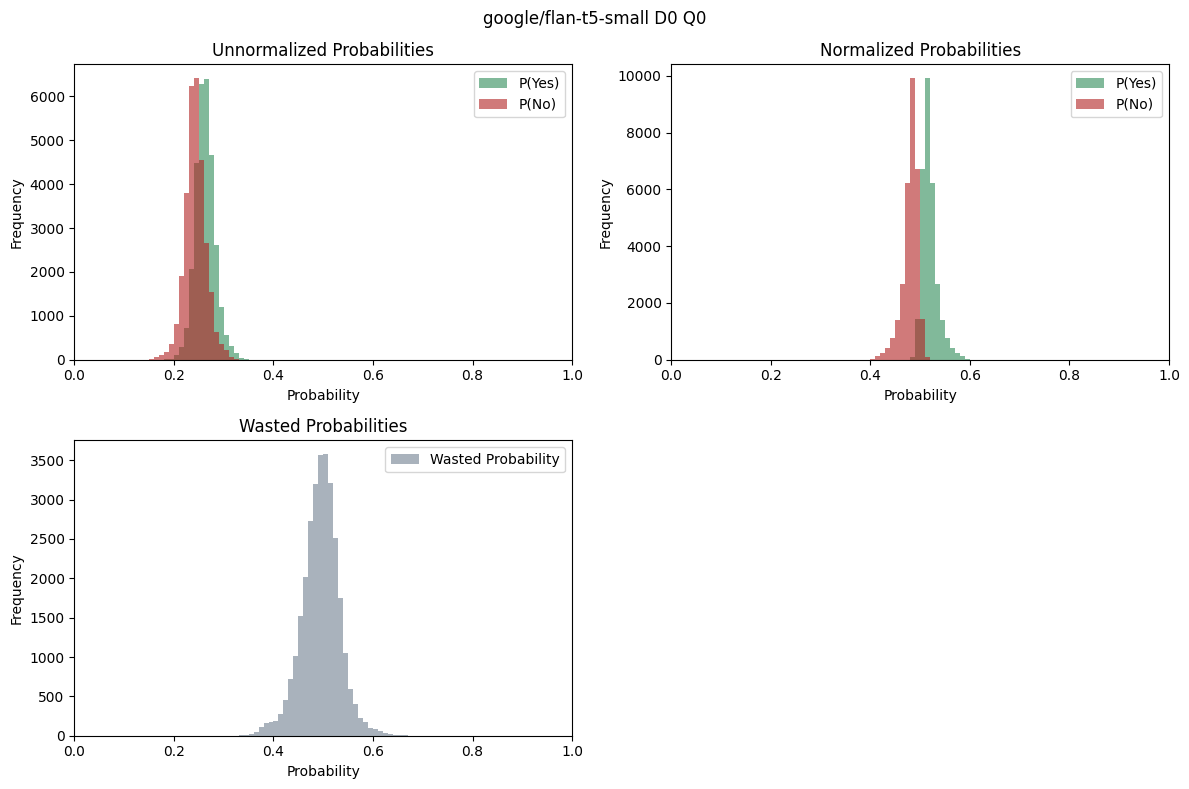

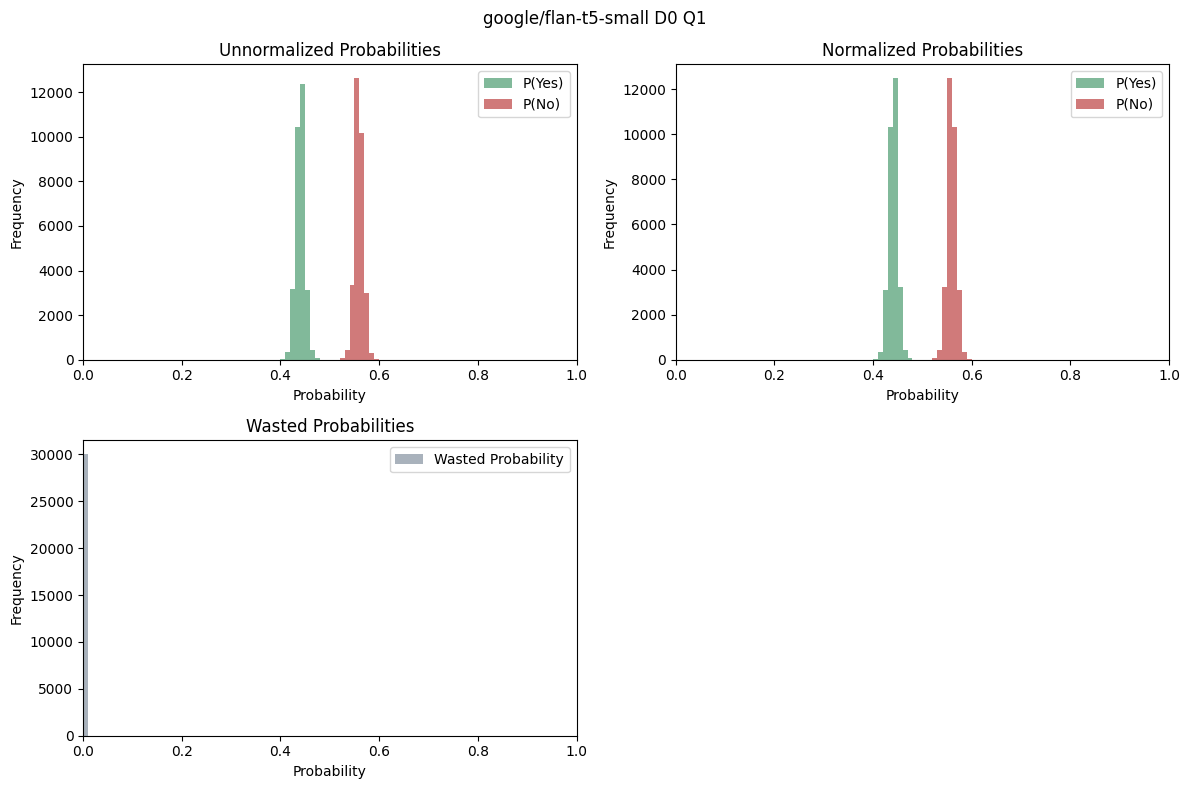

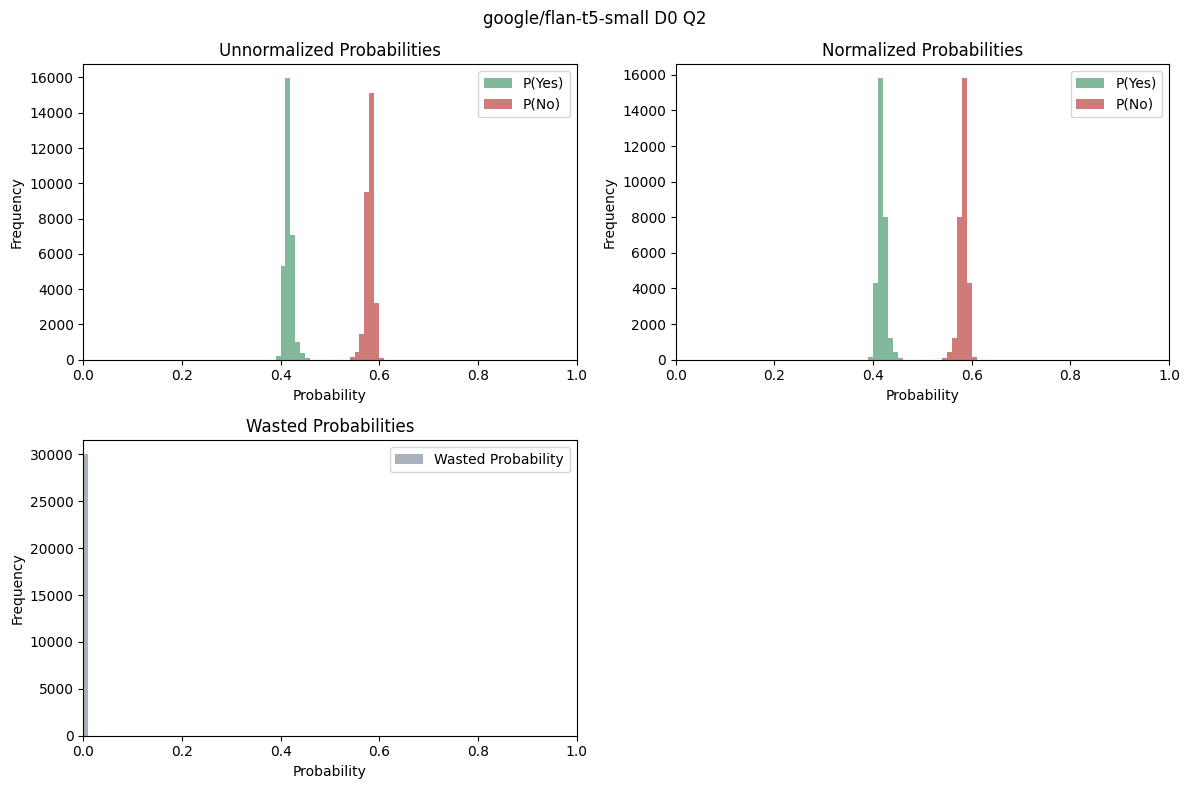

In [10]:
for model,model_df in results_dict.items():
    display(HTML(f"<h1>{model}</h1>"))
    
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    fig.suptitle(model)
    
    plot_unnormalized_probabilities(model_df, axes[0,0])
    plot_normalized_probabilities(model_df, axes[0,1])
    plot_wasted_probabilities(model_df, axes[1,0])
    axes[1,1].axis("off")
    
    plt.tight_layout()
    plt.show()


# Histogram of Waste

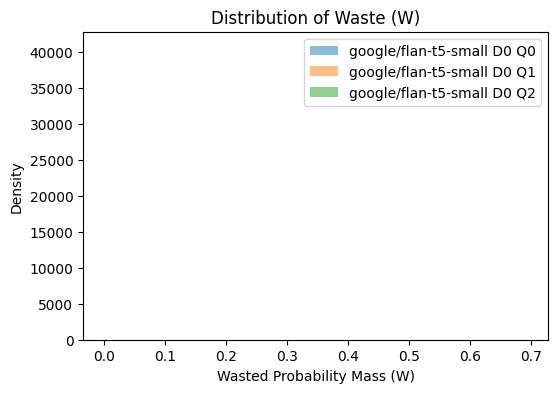

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
for model in models:
    W = validation_df[model]['yes_prob'] + validation_df[model]['no_prob']
    W = 1 - W  # wasted mass
    plt.hist(W, bins=30, alpha=0.5, label=model, density=True)
plt.xlabel("Wasted Probability Mass (W)")
plt.ylabel("Density")
plt.title("Distribution of Waste (W)")
plt.legend()
plt.show()


# Boxplot of Waste by Correctness

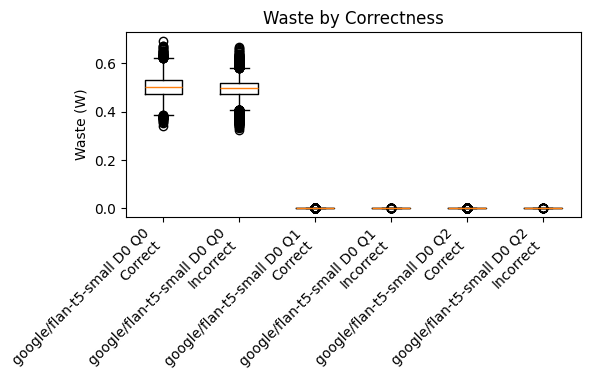

In [12]:
plt.figure(figsize=(6,4))
data = []
labels = []
for model in models:
    model_df = validation_df[model][['yes_prob','no_prob']].copy()
    model_df['true'] = validation_df[('target','SeriousDlqin2yrs')]
    model_df['V'] = model_df['yes_prob'] + model_df['no_prob']
    model_df['W'] = 1 - model_df['V']
    model_df['pred'] = (model_df['yes_prob'] >= model_df['no_prob']).astype(int)
    correct_W = model_df.loc[model_df['pred']==model_df['true'],'W']
    wrong_W = model_df.loc[model_df['pred']!=model_df['true'],'W']
    data.extend([correct_W, wrong_W])
    labels.extend([f"{model}\nCorrect", f"{model}\nIncorrect"])

plt.boxplot(data, labels=labels, vert=True)
plt.ylabel("Waste (W)")
plt.title("Waste by Correctness")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Risk–Coverage Curve

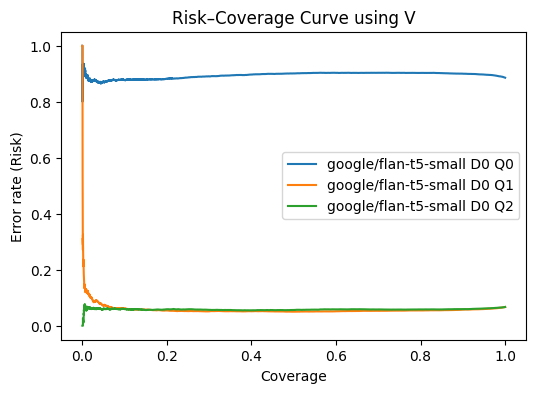

In [13]:
plt.figure(figsize=(6,4))
for model in models:
    model_df = validation_df[model][['yes_prob','no_prob']].copy()
    model_df['true'] = validation_df[('target','SeriousDlqin2yrs')]
    model_df['V'] = model_df['yes_prob'] + model_df['no_prob']
    model_df['pred'] = (model_df['yes_prob'] >= model_df['no_prob']).astype(int)
    model_df['correct'] = (model_df['pred']==model_df['true']).astype(int)
    
    df_sorted = model_df.sort_values('V', ascending=False)
    coverage = np.arange(1, len(df_sorted)+1) / len(df_sorted)
    cum_errors = (1 - df_sorted['correct']).cumsum()
    risk = cum_errors / np.arange(1, len(df_sorted)+1)

    plt.plot(coverage, risk, label=model)

plt.xlabel("Coverage")
plt.ylabel("Error rate (Risk)")
plt.title("Risk–Coverage Curve using V")
plt.legend()
plt.show()


# Log-Loss Decomposition (stacked bar chart)

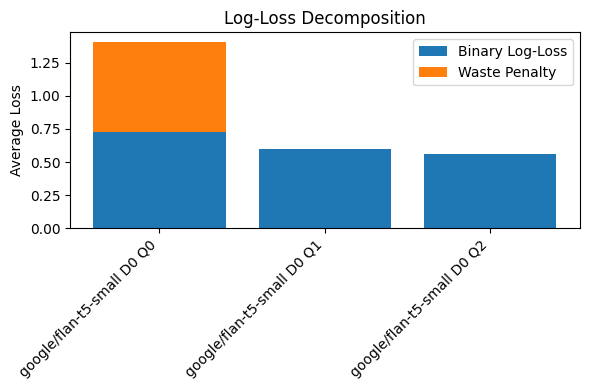

In [14]:
plt.figure(figsize=(6,4))
binary_losses = []
waste_penalties = []
for model in models:
    model_df = validation_df[model][['yes_prob','no_prob']].copy()
    y_true = validation_df[('target','SeriousDlqin2yrs')].values
    
    V = model_df['yes_prob'] + model_df['no_prob']
    yes_norm = model_df['yes_prob'] / V
    y_true_bin = (y_true == 1).astype(int)
    
    binary_loss = -np.mean(y_true_bin*np.log(yes_norm+1e-15) + (1-y_true_bin)*np.log(1-yes_norm+1e-15))
    waste_penalty = -np.mean(np.log(V+1e-15))
    
    binary_losses.append(binary_loss)
    waste_penalties.append(waste_penalty)

x = np.arange(len(models))
plt.bar(x, binary_losses, label="Binary Log-Loss")
plt.bar(x, waste_penalties, bottom=binary_losses, label="Waste Penalty")
plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("Average Loss")
plt.title("Log-Loss Decomposition")
plt.legend()
plt.tight_layout()
plt.show()


# Cumulative W@k Plot

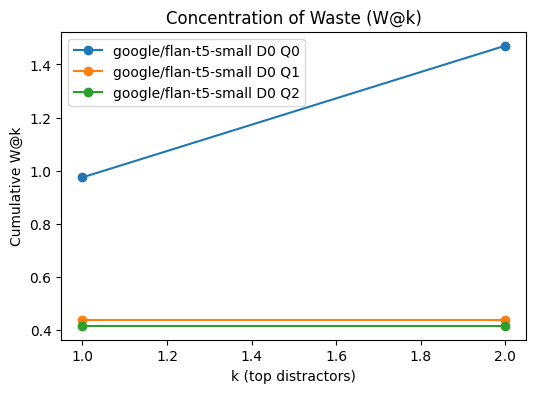

In [15]:
plt.figure(figsize=(6,4))
for model in models:
    probs = validation_df[model].drop(columns=['yes_prob','no_prob'], errors='ignore')
    if probs.empty:
        continue  # skip if no invalid class columns
    
    Wk = []
    k_vals = range(1, min(10, probs.shape[1])+1)  # top 10 distractors max
    for _, row in probs.iterrows():
        sorted_probs = np.sort(row.values)[::-1]
        cumsum = np.cumsum(sorted_probs)
        Wk.append(cumsum[:len(k_vals)])
    Wk = np.mean(Wk, axis=0)
    
    plt.plot(k_vals, Wk, marker='o', label=model)

plt.xlabel("k (top distractors)")
plt.ylabel("Cumulative W@k")
plt.title("Concentration of Waste (W@k)")
plt.legend()
plt.show()


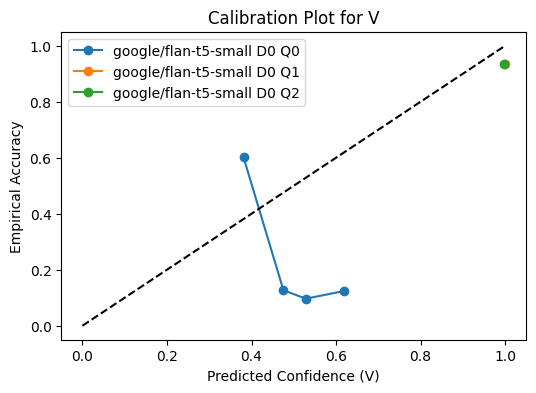

In [16]:
plt.figure(figsize=(6,4))
n_bins = 10
for model in models:
    model_df = validation_df[model][['yes_prob','no_prob']].copy()
    model_df['true'] = validation_df[('target','SeriousDlqin2yrs')]
    model_df['V'] = model_df['yes_prob'] + model_df['no_prob']
    model_df['pred'] = (model_df['yes_prob'] >= model_df['no_prob']).astype(int)
    model_df['correct'] = (model_df['pred']==model_df['true']).astype(int)

    bins = np.linspace(0, 1, n_bins+1)
    indices = np.digitize(model_df['V'], bins) - 1
    accs, confs = [], []
    for b in range(n_bins):
        in_bin = model_df[indices==b]
        if len(in_bin) > 0:
            accs.append(in_bin['correct'].mean())
            confs.append(in_bin['V'].mean())
    plt.plot(confs, accs, marker='o', label=model)

plt.plot([0,1],[0,1], 'k--')  # perfect calibration line
plt.xlabel("Predicted Confidence (V)")
plt.ylabel("Empirical Accuracy")
plt.title("Calibration Plot for V")
plt.legend()
plt.show()
